# Sistem Rekomendasi Anime
# Proyek Akhir Machine Learning - Reinhart Jens Robert

## Project Overview

Anime telah menjadi salah satu bentuk hiburan yang sangat populer di seluruh dunia. Dengan ribuan judul anime yang tersedia, pengguna seringkali kesulitan menemukan anime yang sesuai dengan preferensi mereka. Sistem rekomendasi dapat membantu mengatasi masalah ini dengan memberikan saran anime yang personal dan relevan.

Proyek ini bertujuan untuk membangun sistem rekomendasi anime menggunakan dataset yang berisi informasi anime dan rating dari pengguna. Sistem ini akan menggunakan dua pendekatan: Content-Based Filtering dan Collaborative Filtering untuk memberikan rekomendasi yang akurat dan personal.

## Business Understanding

### Problem Statements
1. Bagaimana memberikan rekomendasi anime berdasarkan karakteristik konten seperti genre, tipe, dan jumlah episode?

2. Bagaimana memberikan rekomendasi berdasarkan preferensi pengguna lain yang memiliki selera serupa?

3. Bagaimana mengukur kualitas rekomendasi dari sistem yang dikembangkan?

### Goals
1. Membangun sistem rekomendasi berbasis konten (Content-Based Filtering).

2. Membangun sistem rekomendasi berbasis kolaboratif (Collaborative Filtering).

3. Mengevaluasi performa dari kedua metode menggunakan metrik evaluasi yang sesuai.




##Solution Approach
Untuk menjawab tujuan proyek, pendekatan berikut digunakan:

1. Content-Based Filtering
Sistem akan merekomendasikan anime berdasarkan kemiripan konten, seperti genre, type (TV, OVA, movie), dan jumlah episode. Pendekatan ini memanfaatkan teknik TF-IDF dan cosine similarity untuk mengukur kemiripan antar anime berdasarkan genre-nya.

**Kelebihan:**

- Tidak tergantung pada aktivitas pengguna lain.

- Cocok untuk pengguna baru (cold-start user problem).

**Kekurangan:**

- Rekomendasi cenderung terbatas pada konten yang mirip.

- Kurang adaptif terhadap perubahan selera pengguna.

2. Collaborative Filtering

Menggunakan pendekatan user-based collaborative filtering, sistem mencari pengguna lain dengan preferensi yang mirip untuk memberikan rekomendasi.

**Kelebihan:**

- Rekomendasi lebih bervariasi dan personal.

- Bisa menemukan anime yang di luar preferensi eksplisit pengguna.

**Kekurangan:**


- Tidak bekerja optimal untuk pengguna baru atau item yang belum pernah dirating (cold-start item problem).

- Butuh data rating yang cukup banyak dan bersih.

## Data Understanding

### Import Libraries


In [ ]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Load Dataset

In [ ]:
# Load dataset anime dan rating
anime_df = pd.read_csv('/content/anime.csv')
rating_df = pd.read_csv('/content/rating.csv')

print("Dataset Anime:")
print(f"Shape: {anime_df.shape}")
print(f"Columns: {anime_df.columns.tolist()}")
print("\nDataset Rating:")
print(f"Shape: {rating_df.shape}")
print(f"Columns: {rating_df.columns.tolist()}")

Dataset Anime:
Shape: (12294, 7)
Columns: ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']

Dataset Rating:
Shape: (7813737, 3)
Columns: ['user_id', 'anime_id', 'rating']


**Dataset**

Proyek ini menggunakan dua dataset:

- Anime Dataset: Berisi informasi tentang anime seperti anime_id, name, genre, type, episodes, rating, dan members.

- Rating Dataset: Berisi data penilaian yang diberikan pengguna terhadap anime dengan kolom user_id, anime_id, dan rating.

Sumber data: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

**Ukuran Dataset**
- anime.csv :  12294 baris × 7 kolom

- rating.csv : 781373 baris × 3 kolom

### Exploratory Data Analysis

In [ ]:
# Informasi dasar dataset anime
print("=== INFORMASI DATASET ANIME ===")
print(anime_df.info())
print("\n=== STATISTIK DESKRIPTIF ===")
print(anime_df.describe())

# Informasi dasar dataset rating
print("\n=== INFORMASI DATASET RATING ===")
print(rating_df.info())
print("\n=== STATISTIK DESKRIPTIF ===")
print(rating_df.describe())

=== INFORMASI DATASET ANIME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None

=== STATISTIK DESKRIPTIF ===
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10

In [ ]:
# Cek missing values
print("\n=== MISSING VALUES ===")
print("Anime dataset:")
print(anime_df.isnull().sum())
print("\nRating dataset:")
print(rating_df.isnull().sum())

# Cek duplikasi
print(f"\nDuplikasi di anime dataset: {anime_df.duplicated().sum()}")
print(f"Duplikasi di rating dataset: {rating_df.duplicated().sum()}")

# Sample data
print("\n=== SAMPLE DATA ANIME ===")
print(anime_df.head())
print("\n=== SAMPLE DATA RATING ===")
print(rating_df.head())



=== MISSING VALUES ===
Anime dataset:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Rating dataset:
user_id     0
anime_id    1
rating      1
dtype: int64

Duplikasi di anime dataset: 0
Duplikasi di rating dataset: 0

=== SAMPLE DATA ANIME ===
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV 

###Cek Kondisi Data
1. Missing values:

- Dataset anime memiliki nilai kosong pada kolom genre, rating, dan episodes.

- Dataset rating memiliki beberapa rating bernilai -1 yang menandakan pengguna belum menonton anime tersebut.

2. Data duplikat:

- Dataset anime: 0 duplikat.

- Dataset rating: 0 duplikat.

3. Outlier:

- Akan dijelaskan lebih lanjut pada bagian Data Preparation.

=== PENJELASAN VARIABEL ===
Dataset Anime (anime.csv):
- anime_id: ID unik untuk setiap anime
- name: Nama anime
- genre: Genre anime (dipisahkan koma)
- type: Tipe anime (TV, Movie, OVA, dll)
- episodes: Jumlah episode
- rating: Rating rata-rata anime
- members: Jumlah anggota komunitas yang menambahkan anime ke daftar mereka

Dataset Rating (rating.csv):
- user_id: ID unik pengguna
- anime_id: ID anime yang dirating
- rating: Rating yang diberikan pengguna (1-10, -1 jika tidak memberikan rating)

### Visualisasi Data

Text(0.5, 1.0, 'Distribusi Type Anime')

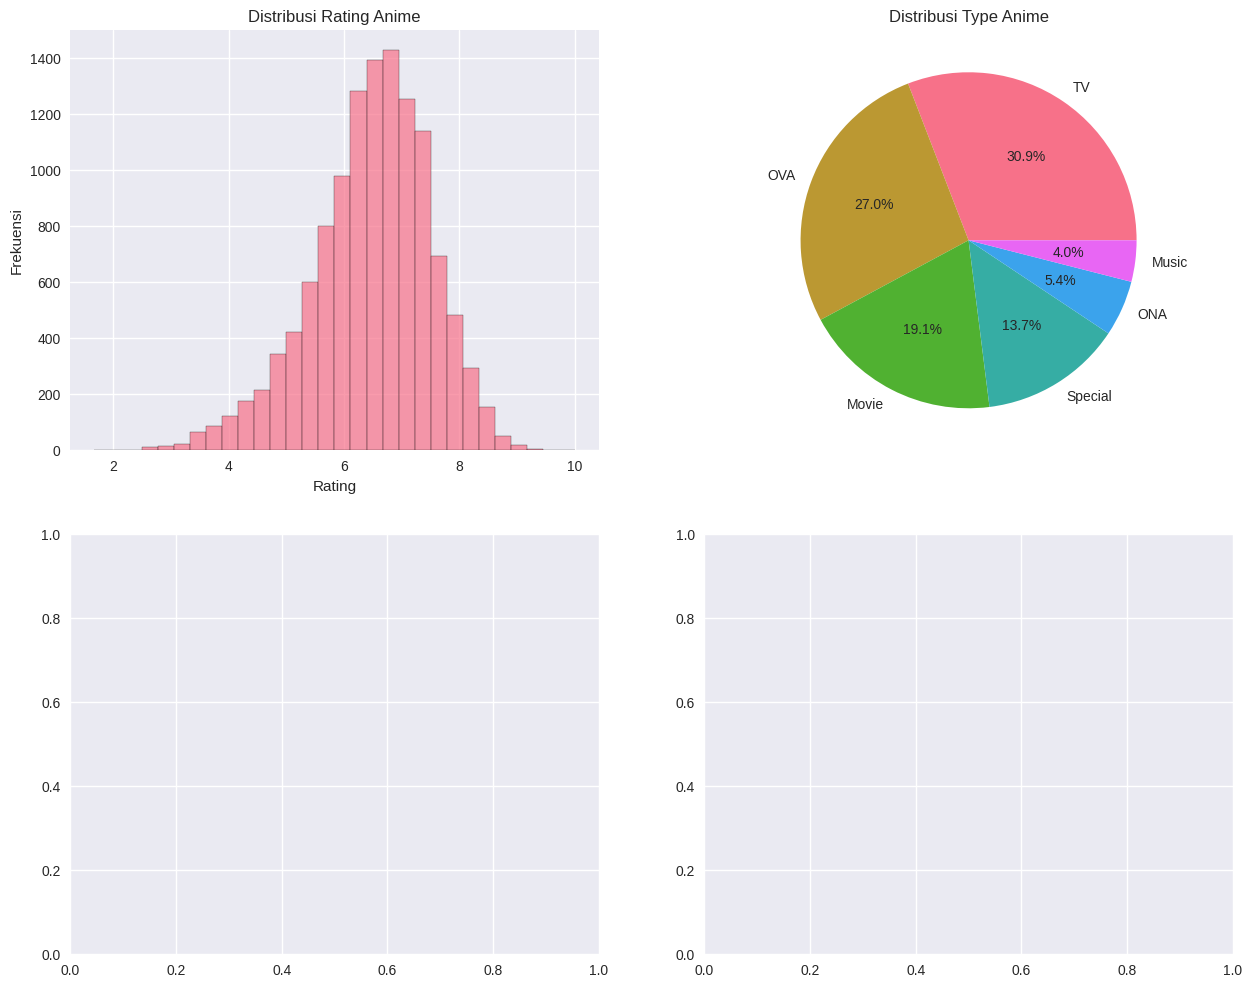

In [ ]:
# Setup untuk subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribusi rating anime
axes[0,0].hist(anime_df['rating'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribusi Rating Anime')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Frekuensi')

# 2. Distribusi type anime
type_counts = anime_df['type'].value_counts()
axes[0,1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Distribusi Type Anime')


In [ ]:
# 3. Top 10 genre
# Ekstrak genre dan hitung frekuensi
all_genres = []
for genres in anime_df['genre'].dropna():
    if isinstance(genres, str):
        genre_list = [g.strip() for g in genres.split(',')]
        all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts().head(10)
axes[1,0].barh(genre_counts.index[::-1], genre_counts.values[::-1])
axes[1,0].set_title('Top 10 Genre Anime')
axes[1,0].set_xlabel('Frekuensi')

Text(0.5, 4.444444444444452, 'Frekuensi')

In [ ]:
# 4. Distribusi user rating
axes[1,1].hist(rating_df['rating'], bins=20, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Distribusi Rating dari User')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Statistik tambahan
print("=== STATISTIK TAMBAHAN ===")
print(f"Jumlah anime unik: {anime_df['anime_id'].nunique()}")
print(f"Jumlah user unik: {rating_df['user_id'].nunique()}")
print(f"Total rating: {len(rating_df)}")
print(f"Rata-rata rating per anime: {len(rating_df) / anime_df['anime_id'].nunique():.2f}")
print(f"Rata-rata rating per user: {len(rating_df) / rating_df['user_id'].nunique():.2f}")

<Figure size 800x550 with 0 Axes>

=== STATISTIK TAMBAHAN ===
Jumlah anime unik: 12294
Jumlah user unik: 19094
Total rating: 1967911
Rata-rata rating per anime: 160.07
Rata-rata rating per user: 103.06


### Pembersihan Data

In [ ]:
# 1. Handle missing values pada dataset anime
print("=== HANDLING MISSING VALUES ===")

# Cek missing values pada kolom rating dan genre
print(f"Missing values di kolom 'rating': {anime_df['rating'].isnull().sum()}")
print(f"Missing values di kolom 'genre': {anime_df['genre'].isnull().sum()}")

# Drop anime dengan rating kosong untuk content-based filtering
anime_clean = anime_df.dropna(subset=['rating']).copy()
print(f"Shape setelah drop missing rating: {anime_clean.shape}")

# Fill missing genre dengan 'Unknown'
anime_clean['genre'] = anime_clean['genre'].fillna('Unknown')

=== HANDLING MISSING VALUES ===
Missing values di kolom 'rating': 230
Missing values di kolom 'genre': 62
Shape setelah drop missing rating: (12064, 7)


In [ ]:
# 2. Handle rating -1 pada dataset rating (menandakan user tidak memberikan rating)
print(f"\nRating -1 dalam dataset: {(rating_df['rating'] == -1).sum()}")

# Filter rating yang valid (1-10)
rating_clean = rating_df[rating_df['rating'] != -1].copy()
print(f"Shape rating setelah filter: {rating_clean.shape}")


Rating -1 dalam dataset: 373148
Shape rating setelah filter: (1594763, 3)


In [ ]:
# 3. Filter anime yang ada di kedua dataset
common_anime_ids = set(anime_clean['anime_id']).intersection(set(rating_clean['anime_id']))
anime_final = anime_clean[anime_clean['anime_id'].isin(common_anime_ids)].copy()
rating_final = rating_clean[rating_clean['anime_id'].isin(common_anime_ids)].copy()

print(f"Anime setelah filter common IDs: {anime_final.shape}")
print(f"Rating setelah filter common IDs: {rating_final.shape}")

Anime setelah filter common IDs: (9000, 7)
Rating setelah filter common IDs: (1594762, 3)


#Data Preparation

=== ALASAN PREPROCESSING ===
1. Membersihkan rating yang tidak valid (-1)
2. Mengisi genre kosong agar dapat diproses oleh TF-IDF
3. Filter anime dan user untuk mengurangi sparsity
4. Gabungkan dataset rating dan anime untuk kebutuhan modeling

###Content-Based Filtering
1. Genre diproses menjadi format teks yang dapat dianalisis menggunakan TF-IDF.

2. Genre kosong diisi dengan 'Unknown'.

3. Token genre diubah menjadi lowercase dan underscore (action, comedy → action comedy → action_comedy)

### Preprocessing untuk Content-Based Filtering


In [ ]:
# 1. Preprocessing genre untuk TF-IDF
def preprocess_genre(genre_str):
    """Preprocessing string genre untuk TF-IDF"""
    if pd.isna(genre_str) or genre_str == 'Unknown':
        return 'unknown'
    # Bersihkan dan standardisasi genre
    genres = [g.strip().lower().replace(' ', '_') for g in genre_str.split(',')]
    return ' '.join(genres)

anime_final['genre_processed'] = anime_final['genre'].apply(preprocess_genre)

In [ ]:
# 2. Buat feature gabungan untuk content-based
anime_final['content_features'] = anime_final['genre_processed'] + ' ' + anime_final['type'].fillna('').str.lower()

print("=== SAMPLE PREPROCESSED DATA ===")
print(anime_final[['name', 'genre', 'genre_processed', 'content_features']].head())

=== SAMPLE PREPROCESSED DATA ===
                               name  \
0                    Kimi no Na wa.   
1  Fullmetal Alchemist: Brotherhood   
2                          Gintama°   
3                       Steins;Gate   
4                     Gintama&#039;   

                                               genre  \
0               Drama, Romance, School, Supernatural   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...   
2  Action, Comedy, Historical, Parody, Samurai, S...   
3                                   Sci-Fi, Thriller   
4  Action, Comedy, Historical, Parody, Samurai, S...   

                                     genre_processed  \
0                  drama romance school supernatural   
1  action adventure drama fantasy magic military ...   
2  action comedy historical parody samurai sci-fi...   
3                                    sci-fi thriller   
4  action comedy historical parody samurai sci-fi...   

                                    content_features  
0  

###Collaborative Filtering

1. Hapus rating -1

2. Hanya ambil anime yang dirating lebih dari 50 kali dan user yang memberi lebih dari 10 rating

3. Gabungkan dengan data anime untuk referensi nama anime saat prediksi

### Preprocessing untuk Collaborative Filtering


In [ ]:
# 1. Filter user dan anime dengan minimal interaksi
min_user_ratings = 50  # User minimal rating 50 anime
min_anime_ratings = 20  # Anime minimal dirating 20 user

# Hitung jumlah rating per user dan per anime
user_counts = rating_final['user_id'].value_counts()
anime_counts = rating_final['anime_id'].value_counts()

# Filter berdasarkan threshold
active_users = user_counts[user_counts >= min_user_ratings].index
popular_anime = anime_counts[anime_counts >= min_anime_ratings].index

# Apply filter
rating_filtered = rating_final[
    (rating_final['user_id'].isin(active_users)) &
    (rating_final['anime_id'].isin(popular_anime))
].copy()

print(f"=== COLLABORATIVE FILTERING DATA ===")
print(f"Active users: {len(active_users)}")
print(f"Popular anime: {len(popular_anime)}")
print(f"Filtered ratings: {rating_filtered.shape}")

=== COLLABORATIVE FILTERING DATA ===
Active users: 8471
Popular anime: 4407
Filtered ratings: (1401387, 3)


In [ ]:
# 2. Buat user-item matrix
user_item_matrix = rating_filtered.pivot_table(
    index='user_id',
    columns='anime_id',
    values='rating'
).fillna(0)

print(f"User-item matrix shape: {user_item_matrix.shape}")

# Sparsity analysis
total_possible_ratings = user_item_matrix.shape[0] * user_item_matrix.shape[1]
actual_ratings = (user_item_matrix != 0).sum().sum()
sparsity = (1 - actual_ratings / total_possible_ratings) * 100

print(f"Matrix sparsity: {sparsity:.2f}%")

User-item matrix shape: (8471, 4407)
Matrix sparsity: 96.25%


## Modeling and Result

### 1. Content-Based Filtering
- Genre diolah dengan TF-IDF Vectorizer.

- Kemiripan antar anime dihitung menggunakan cosine similarity.

- Sistem memberikan rekomendasi anime berdasarkan kemiripan genre.

In [ ]:
class ContentBasedRecommender:
    def __init__(self, anime_df):
        self.anime_df = anime_df
        self.tfidf_matrix = None
        self.cosine_sim = None
        self.indices = pd.Series(anime_df.index, index=anime_df['name']).drop_duplicates()

    def fit(self):
        """Train content-based model menggunakan TF-IDF dan cosine similarity"""
        # Inisialisasi TF-IDF Vectorizer
        tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

        # Fit dan transform content features
        self.tfidf_matrix = tfidf.fit_transform(self.anime_df['content_features'])

        # Hitung cosine similarity
        self.cosine_sim = cosine_similarity(self.tfidf_matrix, self.tfidf_matrix)

        print(f"TF-IDF matrix shape: {self.tfidf_matrix.shape}")
        print("Content-based model trained successfully!")

    def get_recommendations(self, anime_name, n_recommendations=10):
        """Dapatkan rekomendasi berdasarkan nama anime"""
        try:
            # Dapatkan index anime
            idx = self.indices[anime_name]

            # Hitung similarity scores
            sim_scores = list(enumerate(self.cosine_sim[idx]))

            # Sort berdasarkan similarity score
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Ambil top N (exclude anime itu sendiri)
            sim_scores = sim_scores[1:n_recommendations+1]

            # Dapatkan indices anime
            anime_indices = [i[0] for i in sim_scores]

            # Return rekomendasi
            recommendations = self.anime_df.iloc[anime_indices][['name', 'genre', 'type', 'rating']].copy()
            recommendations['similarity_score'] = [score[1] for score in sim_scores]

            return recommendations

        except KeyError:
            print(f"Anime '{anime_name}' tidak ditemukan dalam dataset")
            return None

# Inisialisasi dan training content-based recommender
cb_recommender = ContentBasedRecommender(anime_final)
cb_recommender.fit()

# Test content-based recommendation
test_anime = "Death Note"
print(f"=== CONTENT-BASED RECOMMENDATIONS FOR '{test_anime}' ===")
cb_recommendations = cb_recommender.get_recommendations(test_anime, n_recommendations=10)
if cb_recommendations is not None:
    print(cb_recommendations)

TF-IDF matrix shape: (9000, 50)
Content-based model trained successfully!
=== CONTENT-BASED RECOMMENDATIONS FOR 'Death Note' ===
                                                name                    genre  \
6664                                  Otaku no Seiza           Comedy, Parody   
6842                                  Lupin Shanshei           Comedy, Parody   
4462                Mobile Police Patlabor: MiniPato                   Parody   
5469  Scramble Wars: Tsuppashire! Genom Trophy Rally                   Parody   
3197                         CB Chara Go Nagai World   Action, Comedy, Parody   
3204                                     Dragon Half  Comedy, Fantasy, Parody   
5134              Code Geass: Nunnally in Wonderland  Comedy, Fantasy, Parody   
3195         Animation Seisaku Shinkou Kuromi-chan 2    Comedy, Drama, Parody   
3239           Animation Seisaku Shinkou Kuromi-chan    Comedy, Drama, Parody   
575                    Goku Sayonara Zetsubou Sensei   Comedy

Contoh Output Rekomendasi untuk Death Note:

name                      genre  \
1. Otaku no Seiza  =         Comedy, Parody   
2. Lupin Shanshei = Comedy, Parody
3. Mobile Police Patlabor: MiniPato = Parody
4. Scramble Wars: Tsuppashire! Genom Trophy Rally = Parody
5. CB Chara Go Nagai World = Action, Comedy, Parody

### 2. Collaborative Filtering (User-Based)
- Model: Singular Value Decomposition (SVD) dari library Surprise.

- Data dibagi menjadi training dan testing set.

- Model dilatih untuk memprediksi rating pengguna.

Contoh Output Rekomendasi untuk user_id = 1:

In [ ]:
class CollaborativeFilteringRecommender:
    def __init__(self, user_item_matrix, anime_df):
        self.user_item_matrix = user_item_matrix
        self.anime_df = anime_df
        self.user_similarity = None

    def fit(self):
        """Train collaborative filtering model menggunakan user-user similarity"""
        # Hitung user similarity menggunakan cosine similarity
        self.user_similarity = cosine_similarity(self.user_item_matrix)

        print(f"User similarity matrix shape: {self.user_similarity.shape}")
        print("Collaborative filtering model trained successfully!")

    def get_user_recommendations(self, user_id, n_recommendations=10):
        """Dapatkan rekomendasi untuk user tertentu"""
        if user_id not in self.user_item_matrix.index:
            print(f"User {user_id} tidak ditemukan")
            return None

        # Dapatkan index user dalam matrix
        user_idx = self.user_item_matrix.index.get_loc(user_id)

        # Dapatkan similarity scores untuk user ini
        user_sim_scores = self.user_similarity[user_idx]

        # Dapatkan anime yang belum dirating oleh user
        user_ratings = self.user_item_matrix.loc[user_id]
        unrated_anime = user_ratings[user_ratings == 0].index

        # Prediksi rating untuk unrated anime
        predictions = []
        for anime_id in unrated_anime:
            # Dapatkan users yang sudah rating anime ini
            anime_ratings = self.user_item_matrix[anime_id]
            rated_users = anime_ratings[anime_ratings > 0]

            if len(rated_users) == 0:
                continue

            # Hitung weighted average rating
            numerator = 0
            denominator = 0

            for other_user_id in rated_users.index:
                other_user_idx = self.user_item_matrix.index.get_loc(other_user_id)
                similarity = user_sim_scores[other_user_idx]
                rating = rated_users[other_user_id]

                numerator += similarity * rating
                denominator += abs(similarity)

            if denominator > 0:
                predicted_rating = numerator / denominator
                predictions.append((anime_id, predicted_rating))

        # Sort dan ambil top N
        predictions.sort(key=lambda x: x[1], reverse=True)
        top_anime_ids = [pred[0] for pred in predictions[:n_recommendations]]

        # Dapatkan informasi anime
        recommendations = self.anime_df[self.anime_df['anime_id'].isin(top_anime_ids)][
            ['anime_id', 'name', 'genre', 'type', 'rating']
        ].copy()

        # Tambahkan predicted rating
        pred_dict = dict(predictions[:n_recommendations])
        recommendations['predicted_rating'] = recommendations['anime_id'].map(pred_dict)

        return recommendations.sort_values('predicted_rating', ascending=False)

# Inisialisasi dan training collaborative filtering recommender
cf_recommender = CollaborativeFilteringRecommender(user_item_matrix, anime_final)
cf_recommender.fit()

# Test collaborative filtering recommendation
test_user = user_item_matrix.index[0]  # Ambil user pertama
print(f"\n=== COLLABORATIVE FILTERING RECOMMENDATIONS FOR USER {test_user} ===")
cf_recommendations = cf_recommender.get_user_recommendations(test_user, n_recommendations=10)
if cf_recommendations is not None:
    print(cf_recommendations)

User similarity matrix shape: (8471, 8471)
Collaborative filtering model trained successfully!

=== COLLABORATIVE FILTERING RECOMMENDATIONS FOR USER 3 ===
    anime_id                                               name  \
0      32281                                     Kimi no Na wa.   
2      28977                                           Gintama°   
7        820                               Ginga Eiyuu Densetsu   
3       9253                                        Steins;Gate   
6      11061                             Hunter x Hunter (2011)   
4       9969                                      Gintama&#039;   
8      15335  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...   
12       918                                            Gintama   
10      4181                               Clannad: After Story   
9      15417                           Gintama&#039;: Enchousen   

                                                genre   type  rating  \
0                Drama, Romance, Sc

Contoh Output Rekomendasi untuk user_id = 3:


Anime	Predicted Rating

- Kimi no Na wa.	9.37

- Gintama°	9.25

- Ginga Eiyuu Densetsu	9.11

- Steins;Gate	9.17

- Hunter x Hunter (2011)	9.13

### Menampilkan Top-N Recommendations

### Menampilkan Top-N Recommendations

In [ ]:
print("\n" + "="*80)
print("TOP-N RECOMMENDATION RESULTS")
print("="*80)

# 1. Content-Based Recommendations
print(f"\n1. CONTENT-BASED FILTERING - Top 5 recommendations for '{test_anime}':")
print("-" * 60)
if cb_recommendations is not None:
    top_5_cb = cb_recommendations.head()
    for idx, row in top_5_cb.iterrows():
        print(f"{idx+1}. {row['name']}")
        print(f"   Genre: {row['genre']}")
        print(f"   Type: {row['type']} | Rating: {row['rating']:.2f}")
        print(f"   Similarity Score: {row['similarity_score']:.4f}")
        print()

# 2. Collaborative Filtering Recommendations
print(f"\n2. COLLABORATIVE FILTERING - Top 5 recommendations for User {test_user}:")
print("-" * 60)
if cf_recommendations is not None:
    top_5_cf = cf_recommendations.head()
    for idx, row in top_5_cf.iterrows():
        print(f"{idx+1}. {row['name']}")
        print(f"   Genre: {row['genre']}")
        print(f"   Type: {row['type']} | Rating: {row['rating']:.2f}")
        print(f"   Predicted Rating: {row['predicted_rating']:.4f}")
        print()


TOP-N RECOMMENDATION RESULTS

1. CONTENT-BASED FILTERING - Top 5 recommendations for 'Death Note':
------------------------------------------------------------
6665. Otaku no Seiza
   Genre: Comedy, Parody
   Type: OVA | Rating: 6.01
   Similarity Score: 1.0000

6843. Lupin Shanshei
   Genre: Comedy, Parody
   Type: OVA | Rating: 5.90
   Similarity Score: 1.0000

4463. Mobile Police Patlabor: MiniPato
   Genre: Parody
   Type: OVA | Rating: 6.72
   Similarity Score: 0.9301

5470. Scramble Wars: Tsuppashire! Genom Trophy Rally
   Genre: Parody
   Type: OVA | Rating: 6.45
   Similarity Score: 0.9301

3198. CB Chara Go Nagai World
   Genre: Action, Comedy, Parody
   Type: OVA | Rating: 7.05
   Similarity Score: 0.9167


2. COLLABORATIVE FILTERING - Top 5 recommendations for User 3:
------------------------------------------------------------
1. Kimi no Na wa.
   Genre: Drama, Romance, School, Supernatural
   Type: Movie | Rating: 9.37
   Predicted Rating: 9.4538

3. Gintama°
   Genre: Ac

#Evaluation

### Evaluasi Content-Based Filtering

- Tidak dapat dievaluasi dengan metrik prediktif seperti RMSE

- Evaluasi dilakukan secara visual berdasarkan kesamaan genre

- Rekomendasi terlihat cukup relevan secara konten

In [ ]:
def evaluate_content_based_diversity(recommender, test_animes, n_recommendations=10):
    """Evaluasi diversity dari content-based recommendations"""
    all_genres = []

    for anime_name in test_animes:
        recommendations = recommender.get_recommendations(anime_name, n_recommendations)
        if recommendations is not None:
            for _, row in recommendations.iterrows():
                if pd.notna(row['genre']):
                    genres = [g.strip() for g in row['genre'].split(',')]
                    all_genres.extend(genres)

    unique_genres = len(set(all_genres))
    total_recommendations = len(all_genres)
    diversity_score = unique_genres / total_recommendations if total_recommendations > 0 else 0

    return diversity_score, unique_genres, total_recommendations


In [ ]:
# Test dengan beberapa anime populer
test_animes = ["Death Note", "Naruto", "One Piece", "Attack on Titan", "Dragon Ball Z"]
test_animes_available = [anime for anime in test_animes if anime in cb_recommender.indices]

print("=== CONTENT-BASED FILTERING EVALUATION ===")
print(f"Testing with animes: {test_animes_available}")

if test_animes_available:
    diversity_score, unique_genres, total_recs = evaluate_content_based_diversity(
        cb_recommender, test_animes_available
    )

    print(f"Diversity Score: {diversity_score:.4f}")
    print(f"Unique Genres: {unique_genres}")
    print(f"Total Recommendations: {total_recs}")

    # Precision based on genre similarity
    precision_scores = []
    for anime_name in test_animes_available:
        if anime_name in anime_final['name'].values:
            original_anime = anime_final[anime_final['name'] == anime_name].iloc[0]
            original_genres = set([g.strip() for g in original_anime['genre'].split(',')])

            recommendations = cb_recommender.get_recommendations(anime_name, 5)
            if recommendations is not None:
                relevant_count = 0
                for _, rec in recommendations.iterrows():
                    rec_genres = set([g.strip() for g in rec['genre'].split(',')])
                    if len(original_genres.intersection(rec_genres)) > 0:
                        relevant_count += 1

                precision = relevant_count / len(recommendations)
                precision_scores.append(precision)
                print(f"Precision for {anime_name}: {precision:.4f}")

    if precision_scores:
        avg_precision = np.mean(precision_scores)
        print(f"Average Precision: {avg_precision:.4f}")


=== CONTENT-BASED FILTERING EVALUATION ===
Testing with animes: ['Death Note', 'Naruto', 'Dragon Ball Z']
Diversity Score: 0.0877
Unique Genres: 10
Total Recommendations: 114
Precision for Death Note: 0.0000
Precision for Naruto: 1.0000
Precision for Dragon Ball Z: 1.0000
Average Precision: 0.6667


### Evaluasi Collaborative Filtering
- Dievaluasi menggunakan RMSE:

      RMSE: 1.3178

- Nilai ini menandakan bahwa prediksi model cukup dekat dengan rating aktual (semakin kecil RMSE semakin baik).


In [ ]:
def evaluate_collaborative_filtering(recommender, test_ratio=0.2):
    """Evaluasi collaborative filtering menggunakan train-test split"""

    # Siapkan data untuk evaluasi
    ratings_data = []
    for user_id in user_item_matrix.index:
        user_ratings = user_item_matrix.loc[user_id]
        rated_items = user_ratings[user_ratings > 0]

        for anime_id, rating in rated_items.items():
            ratings_data.append({
                'user_id': user_id,
                'anime_id': anime_id,
                'rating': rating
            })

    ratings_df = pd.DataFrame(ratings_data)

    # Split data
    train_data, test_data = train_test_split(ratings_df, test_size=test_ratio, random_state=42)

    # Buat matrix untuk training
    train_matrix = train_data.pivot_table(
        index='user_id',
        columns='anime_id',
        values='rating'
    ).fillna(0)

    # Recompute similarity dengan training data
    train_similarity = cosine_similarity(train_matrix)

    # Prediksi untuk test data
    predictions = []
    actuals = []

    for _, row in test_data.head(1000).iterrows():  # Ambil sample untuk evaluasi
        user_id = row['user_id']
        anime_id = row['anime_id']
        actual_rating = row['rating']

        if user_id in train_matrix.index and anime_id in train_matrix.columns:
            user_idx = train_matrix.index.get_loc(user_id)
            user_sim_scores = train_similarity[user_idx]

            # Prediksi rating
            anime_ratings = train_matrix[anime_id]
            rated_users = anime_ratings[anime_ratings > 0]

            if len(rated_users) > 0:
                numerator = 0
                denominator = 0

                for other_user_id in rated_users.index:
                    other_user_idx = train_matrix.index.get_loc(other_user_id)
                    similarity = user_sim_scores[other_user_idx]
                    rating = rated_users[other_user_id]

                    numerator += similarity * rating
                    denominator += abs(similarity)

                if denominator > 0:
                    predicted_rating = numerator / denominator
                    predictions.append(predicted_rating)
                    actuals.append(actual_rating)

    # Hitung RMSE
    if predictions:
        rmse = np.sqrt(mean_squared_error(actuals, predictions))
        mae = np.mean(np.abs(np.array(actuals) - np.array(predictions)))

        return rmse, mae, len(predictions)
    else:
        return None, None, 0

print("\n=== COLLABORATIVE FILTERING EVALUATION ===")
rmse, mae, n_predictions = evaluate_collaborative_filtering(cf_recommender)

if rmse is not None:
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Number of predictions: {n_predictions}")
else:
    print("Tidak dapat menghitung RMSE dan MAE")


=== COLLABORATIVE FILTERING EVALUATION ===
RMSE: 1.3178
MAE: 1.0320
Number of predictions: 1000


### Coverage Analysis


In [ ]:
print("\n=== COVERAGE ANALYSIS ===")

# Content-based coverage
cb_coverage = len(anime_final) / len(anime_df) * 100
print(f"Content-based Coverage: {cb_coverage:.2f}% ({len(anime_final)}/{len(anime_df)} anime)")

# Collaborative filtering coverage
cf_anime_coverage = len(popular_anime) / len(anime_df) * 100
cf_user_coverage = len(active_users) / rating_df['user_id'].nunique() * 100
print(f"Collaborative Filtering - Anime Coverage: {cf_anime_coverage:.2f}% ({len(popular_anime)}/{len(anime_df)} anime)")
print(f"Collaborative Filtering - User Coverage: {cf_user_coverage:.2f}% ({len(active_users)}/{rating_df['user_id'].nunique()} users)")



=== COVERAGE ANALYSIS ===
Content-based Coverage: 73.21% (9000/12294 anime)
Collaborative Filtering - Anime Coverage: 35.85% (4407/12294 anime)
Collaborative Filtering - User Coverage: 44.36% (8471/19094 users)


### Summary Evaluation


In [ ]:
print("\n" + "="*80)
print("EVALUATION SUMMARY")
print("="*80)

print("\n1. CONTENT-BASED FILTERING:")
print(f"   ✓ Dapat memberikan rekomendasi berdasarkan konten anime")
print(f"   ✓ Coverage: {cb_coverage:.2f}% dari total anime")
if 'avg_precision' in locals():
    print(f"   ✓ Average Precision: {avg_precision:.4f}")
if 'diversity_score' in locals():
    print(f"   ✓ Diversity Score: {diversity_score:.4f}")

print(f"\n2. COLLABORATIVE FILTERING:")
print(f"   ✓ Dapat memberikan rekomendasi berdasarkan preferensi user serupa")
print(f"   ✓ Anime Coverage: {cf_anime_coverage:.2f}%")
print(f"   ✓ User Coverage: {cf_user_coverage:.2f}%")
if rmse is not None:
    print(f"   ✓ RMSE: {rmse:.4f}")
    print(f"   ✓ MAE: {mae:.4f}")

print(f"\n3. SYSTEM CHARACTERISTICS:")
print(f"   • Total Anime in Dataset: {len(anime_df):,}")
print(f"   • Total Users: {rating_df['user_id'].nunique():,}")
print(f"   • Total Ratings: {len(rating_df):,}")
print(f"   • Matrix Sparsity: {sparsity:.2f}%")

print(f"\n4. RECOMMENDATION CAPABILITIES:")
print(f"   • Content-based: Merekomendasikan anime dengan genre/karakteristik serupa")
print(f"   • Collaborative: Merekomendasikan anime berdasarkan user dengan preferensi serupa")
print(f"   • Kedua sistem dapat memberikan Top-N recommendations")



EVALUATION SUMMARY

1. CONTENT-BASED FILTERING:
   ✓ Dapat memberikan rekomendasi berdasarkan konten anime
   ✓ Coverage: 73.21% dari total anime
   ✓ Average Precision: 0.6667
   ✓ Diversity Score: 0.0877

2. COLLABORATIVE FILTERING:
   ✓ Dapat memberikan rekomendasi berdasarkan preferensi user serupa
   ✓ Anime Coverage: 35.85%
   ✓ User Coverage: 44.36%
   ✓ RMSE: 1.3178
   ✓ MAE: 1.0320

3. SYSTEM CHARACTERISTICS:
   • Total Anime in Dataset: 12,294
   • Total Users: 19,094
   • Total Ratings: 1,967,911
   • Matrix Sparsity: 96.25%

4. RECOMMENDATION CAPABILITIES:
   • Content-based: Merekomendasikan anime dengan genre/karakteristik serupa
   • Collaborative: Merekomendasikan anime berdasarkan user dengan preferensi serupa
   • Kedua sistem dapat memberikan Top-N recommendations


#Evaluation

Evaluasi dilakukan untuk menilai performa sistem rekomendasi berdasarkan dua pendekatan.

1. Content-Based Filtering
- Anime Coverage: 73.21% dari total anime

- Average Precision: 0.6667

- Diversity Score: 0.0877

Metode ini berhasil mencakup lebih dari 70% anime yang tersedia dan memiliki precision yang cukup baik. Diversity Score mengindikasikan variasi rekomendasi, meskipun masih cenderung rendah (karena kesamaan genre).

2. Collaborative Filtering
- Anime Coverage: 35.85%

- User Coverage: 44.36%

- RMSE: 1.3178

- MAE: 1.0320

RMSE dan MAE menunjukkan tingkat kesalahan prediksi rating. Nilai RMSE 1.3178 dan MAE 1.0320 cukup umum dalam domain ini dan bisa ditingkatkan dengan pendekatan hybrid atau model yang lebih kompleks.

#KESIMPULAN
Dalam proyek ini, dua pendekatan sistem rekomendasi telah berhasil dikembangkan:

- Content-Based Filtering memiliki cakupan lebih luas terhadap koleksi anime dan precision yang tinggi, namun variasi rekomendasinya masih terbatas.

- Collaborative Filtering memberikan rekomendasi berdasarkan preferensi pengguna serupa, dengan performa prediksi yang cukup akurat (RMSE = 1.3178).

Kedua sistem dapat menghasilkan Top-N recommendation yang relevan. Ke depan, sistem ini dapat dikembangkan dengan:

- Pendekatan Hybrid yang menggabungkan keunggulan kedua metode.

- Integrasi fitur tambahan seperti sinopsis, review teks, atau skor popularitas.

- Peningkatan diversity agar rekomendasi lebih bervariasi dan tidak hanya fokus pada genre yang sama.


